Epoch 1/10
15/15 [==============================] - 4s 41ms/step - loss: 0.5180 - accuracy: 0.8242 - val_loss: 0.2930 - val_accuracy: 0.9035
Epoch 2/10
15/15 [==============================] - 0s 15ms/step - loss: 0.2675 - accuracy: 0.9055 - val_loss: 0.1463 - val_accuracy: 0.9649
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 0.1843 - accuracy: 0.9363 - val_loss: 0.1019 - val_accuracy: 0.9561
Epoch 4/10
15/15 [==============================] - 0s 22ms/step - loss: 0.1412 - accuracy: 0.9582 - val_loss: 0.0903 - val_accuracy: 0.9649
Epoch 5/10
15/15 [==============================] - 0s 24ms/step - loss: 0.1079 - accuracy: 0.9736 - val_loss: 0.0795 - val_accuracy: 0.9649
Epoch 6/10
15/15 [==============================] - 0s 24ms/step - loss: 0.0968 - accuracy: 0.9670 - val_loss: 0.0658 - val_accuracy: 0.9649
Epoch 7/10
15/15 [==============================] - 0s 25ms/step - loss: 0.0843 - accuracy: 0.9758 - val_loss: 0.0640 - val_accuracy: 0.9737
Epoch 8/10
15

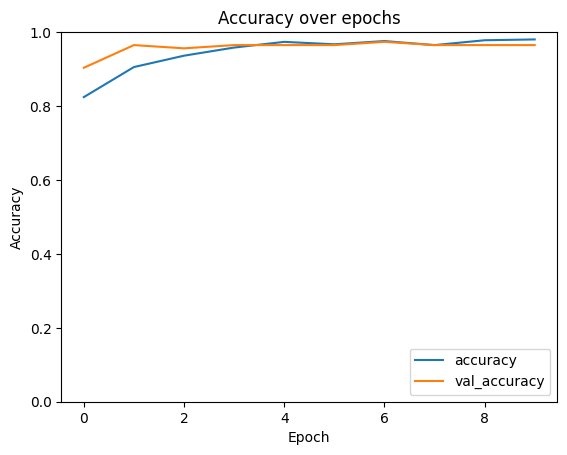

4/4 [==============================] - 1s 6ms/step


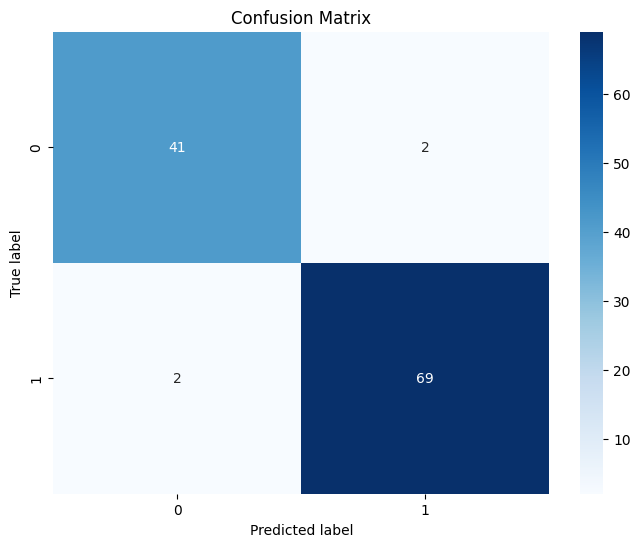

4/4 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [3]:
# Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import seaborn as sns  # Importation de Seaborn

# Chargement du jeu de données Breast Cancer Wisconsin (Diagnostic)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Conversion en DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Séparation des caractéristiques et de la cible
X = df.drop('target', axis=1)
y = df['target']

# Normalisation des caractéristiques
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Redimensionnement pour les couches convolutives (1D)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Encodage des étiquettes cibles
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Fractionnement du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition du modèle CNN
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Évaluation du modèle
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Tracé de l'historique d'entraînement
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Accuracy over epochs')
plt.show()

# Tracé de la matrice de confusion
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, np.round(model.predict(X_test)))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Affichage du rapport de classification
print(classification_report(y_test, np.round(model.predict(X_test))))
